## Evaluacion 4Geeks ML - Luis Alpizar
- Source: https://archive.ics.uci.edu/dataset/863/maternal+health+risk
- Date: 28/04/2025

###  Crear un modelo que prediga el nivel de riesgo de salud materna durante el embarazo

### Paso 0: Importar Librerias

In [78]:
# Importacion de Librerias
# Registros y serialización
import logging
import pickle

# Análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_predict,
    GridSearchCV
)

# Pipelines
from sklearn.pipeline import Pipeline

# Preprocesamiento
from sklearn.preprocessing import (
    PowerTransformer,
    LabelEncoder,
    OneHotEncoder,
    MinMaxScaler
)
from sklearn.compose import ColumnTransformer

# Árboles de decisión
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree

)

# Métricas
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    DetCurveDisplay
)

# Inspección
from sklearn.inspection import permutation_importance

# Configuración del registro
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

### Paso 1: Carga del dataset

In [79]:

df_raw = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df_raw.info()
df_raw.sample(10, random_state= 2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
109,32,140,100,7.9,98.0,78,high risk
185,55,100,65,6.1,98.0,66,low risk
402,35,100,70,7.8,98.0,60,low risk
800,32,120,80,6.8,98.0,70,mid risk
684,32,140,100,6.9,98.0,78,high risk
555,50,130,100,16.0,98.0,75,mid risk
34,21,75,50,6.1,98.0,70,low risk
689,40,160,100,19.0,98.0,77,high risk
172,20,100,90,7.1,98.0,88,low risk
528,15,78,49,7.5,98.0,77,low risk


### Paso 2: Data preprocessing

In [80]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['risklevel'] = df_baking['risklevel'].astype('category')
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          1014 non-null   int64   
 1   systolicbp   1014 non-null   int64   
 2   diastolicbp  1014 non-null   int64   
 3   bs           1014 non-null   float64 
 4   bodytemp     1014 non-null   float64 
 5   heartrate    1014 non-null   int64   
 6   risklevel    1014 non-null   category
dtypes: category(1), float64(2), int64(4)
memory usage: 48.8 KB


In [81]:
display(df_baking.describe(include='number').T)
display(df_baking.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
systolicbp,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
diastolicbp,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
bs,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
bodytemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
heartrate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


,count,unique,top,freq
risklevel,1014,3,low risk,406


In [82]:
df_baking.isna().sum()
df_baking.isnull().sum()

,0
age,0
systolicbp,0
diastolicbp,0
bs,0
bodytemp,0
heartrate,0
risklevel,0


In [83]:
df_y = df_baking['risklevel']
df_y.value_counts()

,count
risklevel,
low risk,406
mid risk,336
high risk,272


La distribucion de las clases no es extremadamente desbalanceada.

In [84]:
df = df_baking.copy()

### Paso 3: Exploratory Data Analysis

In [85]:
#División de los datos en entrenamiento y prueba
df_train, df_test = train_test_split(df, random_state=2025,test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          811 non-null    int64   
 1   systolicbp   811 non-null    int64   
 2   diastolicbp  811 non-null    int64   
 3   bs           811 non-null    float64 
 4   bodytemp     811 non-null    float64 
 5   heartrate    811 non-null    int64   
 6   risklevel    811 non-null    category
dtypes: category(1), float64(2), int64(4)
memory usage: 39.1 KB


- Analisis univariado

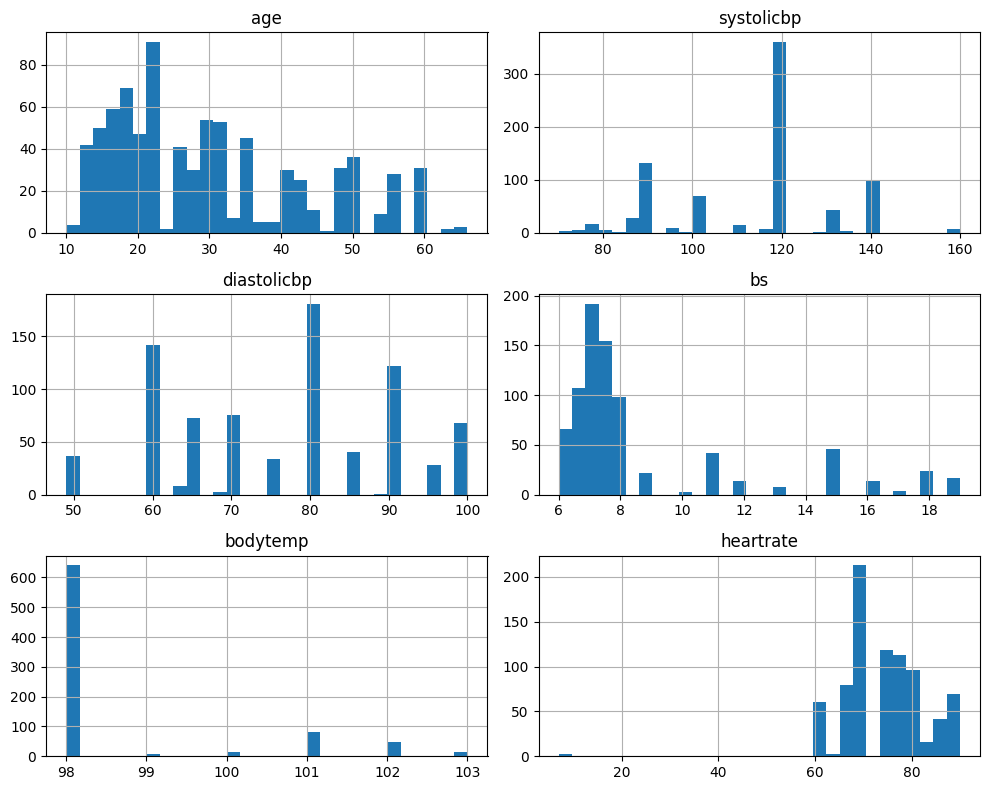

In [47]:
df_train.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

- Analisis bivariado

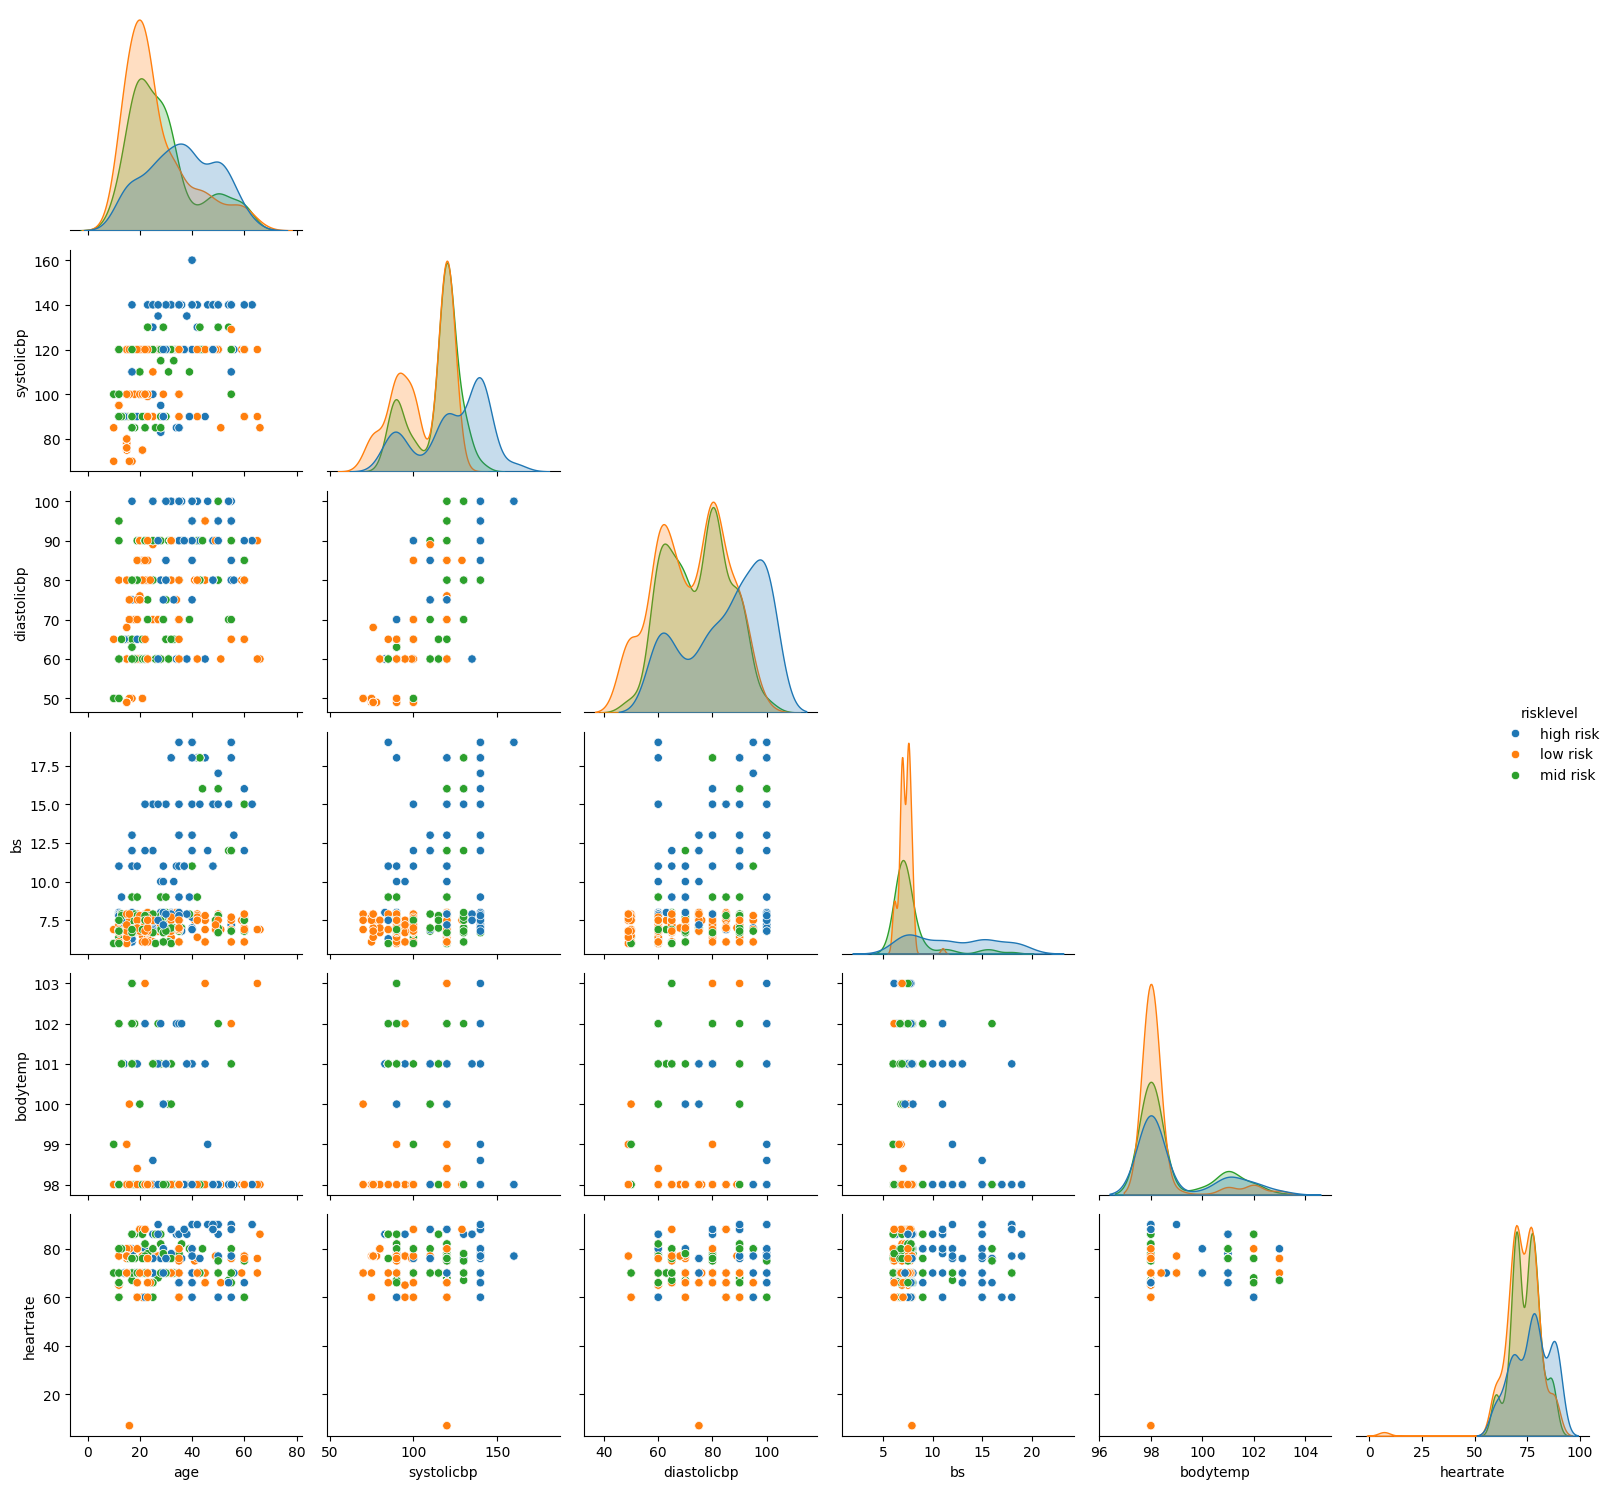

In [48]:
sns.pairplot(data=df_train,hue='risklevel', corner=True)
plt.tight_layout()
plt.show()

- Correalaciones

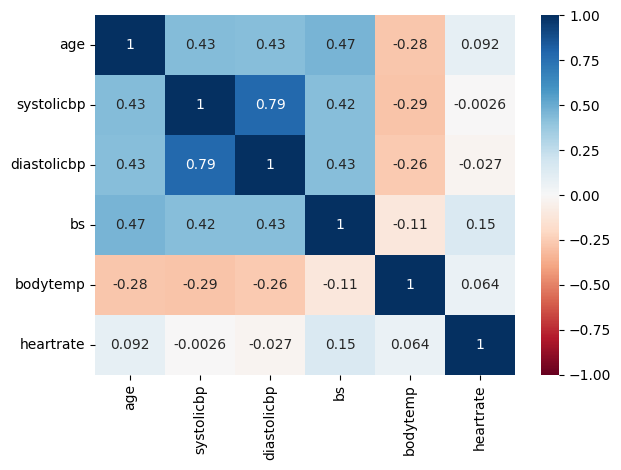

In [38]:
sns.heatmap(data=df_train.select_dtypes('number').corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.tight_layout()
plt.show()

Vemos una correlación en systolicbp	 y diastolicbp

### Paso 4: Machine Learning

In [86]:
X_train = df_train.drop(['risklevel'],axis=1)
y_train = df_train['risklevel']

X_test = df_test.drop(['risklevel'],axis=1)
y_test = df_test['risklevel']

display(X_train.head())
display(y_train.head())

,age,systolicbp,diastolicbp,bs,bodytemp,heartrate
0,15,78,49,7.5,98.0,77
1,36,120,90,7.0,98.0,82
2,23,140,90,6.8,98.0,70
3,50,130,80,16.0,102.0,76
4,45,120,95,7.5,98.0,66


,risklevel
0,low risk
1,mid risk
2,high risk
3,mid risk
4,low risk


In [134]:
#Pipeline
num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

num_proc = Pipeline(steps=[
    ('power', PowerTransformer())
])

processor = ColumnTransformer(transformers=[
    ('num', num_proc, num_cols)
])

#### Decision Tree

In [184]:
clf_tree_p = Pipeline(steps=[
    ('preprocessor', processor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [185]:
clf_tree_p.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  Index(['age', 'systolicbp', 'diastolicbp', 'bs', 'bodytemp', 'heartrate'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [186]:
y_hat = clf_tree_p.predict(X_test)

In [187]:
print("Accuracy:", accuracy_score(y_test, y_hat))

Accuracy: 0.8472906403940886


### Paso 5: Ajuste del modelo

In [191]:
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [192]:
grid_search = GridSearchCV(clf_tree_p, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [193]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         Index(['age', 'systolicbp', 'diastolicbp', 'bs', 'bodytemp', 'heartrate'], dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__splitter': ['best', 'random']},
             scoring='accuracy')

In [194]:
y_hat_best = grid_search.predict(X_test)

In [196]:
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_hat_best))

Mejores hiperparámetros encontrados: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Accuracy: 0.8571428571428571


### Paso 6: Analisis

*Decision Tree*

Mejores Hiperparámetros Encontrados
- Criterio: entropy
- Profundidad Máxima: 20
- Mínimo de Muestras por Hoja: 1
- Mínimo de Muestras para Dividir: 2
- Divisor: best

El modelo de árbol de decisión optimizado con los hiperparámetros encontrados ha mejorado su precisión a un 85.71%.

Esto indica que el modelo es bastante efectivo para predecir el nivel de riesgo de salud materna basado en las características proporcionadas.

El uso del criterio entropy y una profundidad máxima de 20 permite al modelo capturar mejor las relaciones complejas en los datos.

              precision    recall  f1-score   support

   high risk       0.85      0.87      0.86        47
    low risk       0.90      0.83      0.87        89
    mid risk       0.78      0.85      0.81        67

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



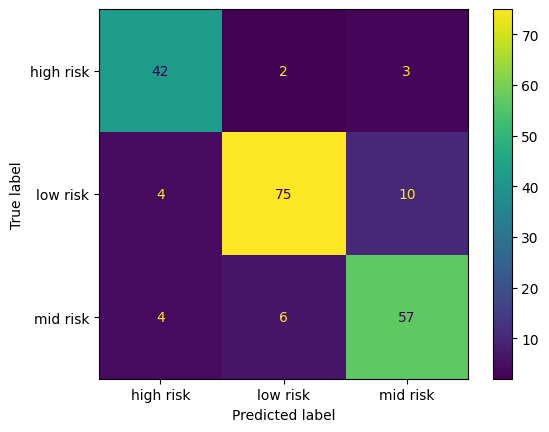

In [199]:
fig,ax = plt.subplots()
print(classification_report(y_test, y_hat))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_best,ax=ax)
plt.show()

- F1-Score, equilibrado en todas las categorías con una diferencia para Mid Risk, lo que indica que el modelo es confiable.
-  El recall más alto es para High Risk (87%), lo que indica que el modelo es efectivo en identificar correctamente los casos de alto riesgo

### Paso 7: Guardar modelo entrenado

In [197]:
with open("clf_tree_p.pkl", "wb") as best_tree01:
    pickle.dump(clf_tree_p, best_tree01)